In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
#libraries are imported here

In [3]:
#this is our data as displayed in CS559B_Assignment-4-S21.pdf
xy = [(5.1,3.8),(4.7,3.2),(4.9,3.1), \
      (5.0,3.0),(4.6,2.9), \
      (5.9,3.2),(6.0,3.0),(6.2,2.8), \
      (6.7,3.1),(5.5,4.2)]
#these are our initial cluster centers
green = (6.6,3.7)
red = (6.2,3.2)
blue = (6.5,3.0)

1. Randomly initialize the cluster centers, $c_1, ..., c_K$
2. Given cluster centers, determine points in each cluster
- For each point $p$, find the closest $c_i$. Put $p$ into cluster $i$
3. Given points in each cluster, solve for $c_i$
- Set $c_i$ to be the mean of points in cluster $i$
4. If $c_i$ have changed, repeat Step 2

pseudocode from: "Slides by Derek Hoiem and Kristen Grauman"

In [4]:
def euclideanDist(pointA, pointB):
    #for each dimenstion(x,y) in A and B square the difference
    #finally take the square root of the sum of those values and return it
    d = 0.0
    for index in range(len(pointA)):
        d += (float(pointA[index])-float(pointB[index]))**2
    d = math.sqrt(d)
    return d

In [5]:
####this function gets the mean x & y values of each cluster storing them in sumattr
def mean(clustr):
    if len(clustr) == 0:
        return None
    if len(clustr) == 1:
        return clustr[0]
    #the above 2 if statements cover edge cases
    sumattr = list(clustr[0])
    for i in clustr[1:]:
        l = 0
        for j in i:
            sumattr[l] += j
            l += 1
    return [ele/len(clustr) for ele in sumattr]

In [6]:
def checker(listA, listB):
    # in this method I iterate through the elements of each list
    # if any are not equal I return False, otherwise I return True
    for i in range(len(listA)):
        if (listA[i] != listB[i]):
            return False
    return True

In [7]:
#this function runs our kmeans algorithm
#data is our data, centers represent our cluster centers and k is the number of clusters
#itter is the counter of this recursive function and would theoretically be used if the data was non-convergent
def kmeans(k,data,centers,itter):
    print('iteration %d'%itter)
    #clusters is a list of lists containg the datapoints within each of the k clusters
    clusters = []
    for count in range(k):
        clusters.append([])
    #new centers contains the centers gathered from the clusters
    newcenters = []
    #within this loop each datapoint is assigned to a cluster using it's euclidean distance to each center
    for datapoint in data:
        #dist contains the euclidean distances between a given datapoint and all cluster centers
        dist = []
        for center in centers:
            dist.append(euclideanDist(datapoint,center))
        #index is our counter within the loop below
        index = 0
        #the loop below adds the current datapoint to the cluster whose center is closest to it(lowest euclidean dist)
        for distance in dist:
            if distance == min(dist):
                clusters[index].append(datapoint)
                break
            index += 1
    #the new cluster centers are updated based on our updated clusters
    for cluster in clusters:
        newcenters.append(mean(cluster))
    #the updated values are printed
    print('clusters = %s'%clusters)
    print('centers = %s'%newcenters)
    #this for loop uses the checker function to see if the algorithm has converged
    #if the newcenters match the old centers exactly then it has converged and the centers and clusters are returned
    #otherwise kmeans is recursively called with the updated clusters and centers alongside the incremented itter
    for a,b in zip(newcenters,centers):
        if not checker(a,b):
            return kmeans(k,data,newcenters,itter+1)
    return (newcenters,clusters)

In [8]:
#sets the initial value of centrs to a list containing our given x,y pairs
centrs = [red,green,blue]
#prints the initial information
print('initial values')
print('clusters = %s'%xy)
print('centers = %s'%centrs)
#runs the kmeans algorithm storing the converged clusters and centers in tupple tup
tup = kmeans(3,xy,centrs,1)

initial values
clusters = [(5.1, 3.8), (4.7, 3.2), (4.9, 3.1), (5.0, 3.0), (4.6, 2.9), (5.9, 3.2), (6.0, 3.0), (6.2, 2.8), (6.7, 3.1), (5.5, 4.2)]
centers = [(6.2, 3.2), (6.6, 3.7), (6.5, 3.0)]
iteration 1
clusters = [[(5.1, 3.8), (4.7, 3.2), (4.9, 3.1), (5.0, 3.0), (4.6, 2.9), (5.9, 3.2), (6.0, 3.0)], [(5.5, 4.2)], [(6.2, 2.8), (6.7, 3.1)]]
centers = [[5.171428571428572, 3.1714285714285713], (5.5, 4.2), [6.45, 2.95]]
iteration 2
clusters = [[(4.7, 3.2), (4.9, 3.1), (5.0, 3.0), (4.6, 2.9)], [(5.1, 3.8), (5.5, 4.2)], [(5.9, 3.2), (6.0, 3.0), (6.2, 2.8), (6.7, 3.1)]]
centers = [[4.800000000000001, 3.0500000000000003], [5.3, 4.0], [6.2, 3.025]]
iteration 3
clusters = [[(4.7, 3.2), (4.9, 3.1), (5.0, 3.0), (4.6, 2.9)], [(5.1, 3.8), (5.5, 4.2)], [(5.9, 3.2), (6.0, 3.0), (6.2, 2.8), (6.7, 3.1)]]
centers = [[4.800000000000001, 3.0500000000000003], [5.3, 4.0], [6.2, 3.025]]


$$
\\ \text{the answer to 4a is }[5.171, 3.171]
\\ \text{the answer to 4b is }[5.300, 4.000]
\\ \text{the answer to 4c is }[6.200, 3.025]
\\ \text{the answer to 4d is 3 iterations because there had to be an additional iteration to confirm convergence}
$$

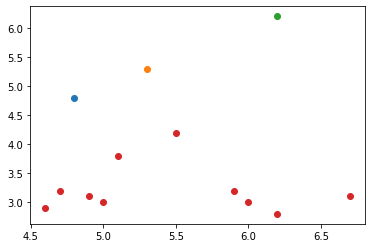

In [18]:
for tmp in tup[0]:
    plt.scatter(np.array(tmp).T[0],np.array(tmp).T[0])
plt.scatter(np.array(xy).T[0],np.array(xy).T[1])
plt.show()